In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [146]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Look at Contacts data first

In [4]:
df_contacts = pd.read_csv("contacts.csv")

In [3]:
df_contacts.info()
len(df_contacts[df_contacts['contact_channel_first']=='contact_me'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27887 entries, 0 to 27886
Data columns (total 14 columns):
id_guest_anon                           27887 non-null object
id_host_anon                            27887 non-null object
id_listing_anon                         27887 non-null object
ts_interaction_first                    27887 non-null object
ts_reply_at_first                       25855 non-null object
ts_accepted_at_first                    16415 non-null object
ts_booking_at                           11587 non-null object
ds_checkin_first                        27887 non-null object
ds_checkout_first                       27887 non-null object
m_guests                                27886 non-null float64
m_interactions                          27887 non-null int64
m_first_message_length_in_characters    27887 non-null float64
contact_channel_first                   27887 non-null object
guest_user_stage_first                  27887 non-null object
dtypes: float64(2), in

12828

# Look at overall stats of the contacts table

In [7]:
pandas_profiling.ProfileReport(df_contacts)

Number of variables,14
Number of observations,27887
Total Missing (%),7.6%
Total size in memory,3.0 MiB
Average record size in memory,112.0 B
Numeric,3
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Identify if there is relationship between message length and bookings

In [5]:
df_contacts[(df_contacts['contact_channel_first']=='contact_me') & \
            (df_contacts['m_first_message_length_in_characters'] >= 1) &\
            (df_contacts['ts_accepted_at_first'].notnull())].groupby('m_first_message_length_in_characters').count()['id_guest_anon'].sort_values(ascending = False).head()

m_first_message_length_in_characters
129.0    29
133.0    27
224.0    27
146.0    26
124.0    24
Name: id_guest_anon, dtype: int64

In [124]:
x = df_contacts[(df_contacts['contact_channel_first']=='contact_me') & \
            (df_contacts['m_first_message_length_in_characters'] >= 1) &\
            (df_contacts['m_first_message_length_in_characters'] <= 750) &
            (df_contacts['ts_accepted_at_first'].notnull())].groupby('m_first_message_length_in_characters').count()['id_guest_anon']

Text(0.5,1,'number of successful bookings')

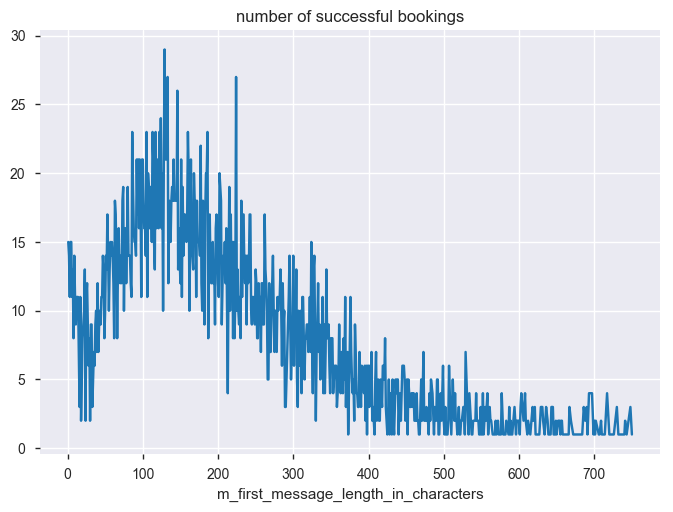

In [125]:
x.plot()
plt.title("number of successful bookings")

### Transform categorical columns to integers

In [6]:
df_contacts['contact_channel_first'] = df_contacts['contact_channel_first'].astype('category')
df_contacts['booking_type_cat'] = df_contacts['contact_channel_first'].cat.codes

In [7]:
df_contacts['contact_channel_first'].cat.categories

Index(['book_it', 'contact_me', 'instant_book'], dtype='object')

### Create a convert column

In [187]:
df_contacts['convert'] = np.where(df_contacts['ts_booking_at'].notnull(), 1, 0)

In [188]:
df_contacts.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,booking_type_cat,convert,ts_interaction_first_month,ds_checkin_first_date,duration
0,1630694d-6e19-463c-a5b9-bc5171322487,97fa1946-b2ac-41bd-854b-0039dc911495,e1f83a70-a590-4a2c-a138-6505f3e3de48,2016-01-17 13:33:32,2016-01-17 13:36:15.0,NaN,NaN,2016-02-06,2016-02-10,2.0,5,80.0,contact_me,new,1,0,1,2016-02-06,4
1,949d0029-4349-4611-9f78-a1990d48ff4a,7bb459cb-3b97-48e9-ba87-309e9dc809c7,b8ece1d0-ed4e-4def-a845-f3cb9f9c6d80,2016-03-15 01:00:48,2016-03-15 12:54:47.0,NaN,NaN,2016-03-18,2016-03-19,2.0,2,0.0,book_it,past_booker,0,0,3,2016-03-18,1
2,4d94ee7f-fd1e-4528-97ac-cf25335b15e5,b15572ec-7a34-4062-8d89-e2906b1a8a31,b4f23a9f-197b-4b3e-95fd-d5d759b11b0b,2016-04-16 22:16:19,2016-04-17 16:07:07.0,2016-04-17 19:40:47.0,NaN,2016-06-03,2016-06-05,2.0,5,44.0,contact_me,past_booker,1,0,4,2016-06-03,2
3,a9b23dcd-5826-4b04-8160-16ba6476afdc,35a90f9a-0e5e-448a-9a3b-103c95b470c0,f3b85ab8-9cd6-4f29-aa99-e472a82066fc,2016-01-10 20:05:02.0,2016-01-10 20:05:02.0,2016-01-10 20:05:02.0,2016-01-10 20:05:02.0,2016-02-04,2016-02-07,1.0,5,220.0,instant_book,new,2,1,1,2016-02-04,3
4,377d9157-cbed-444e-8d91-6be79c81d1c8,cf7199d2-7aaf-42b0-9cdb-9c63fbb2edff,5ea28dcc-b2d2-4c70-972e-54948581fc8b,2016-01-26 23:15:12,2016-01-28 09:38:57.0,2016-01-28 09:38:57.0,NaN,2016-02-08,2016-02-15,2.0,3,158.0,contact_me,new,1,0,1,2016-02-08,7


### Explore
Do new users tend to have more interactions?

Do new users tend to send longer messages

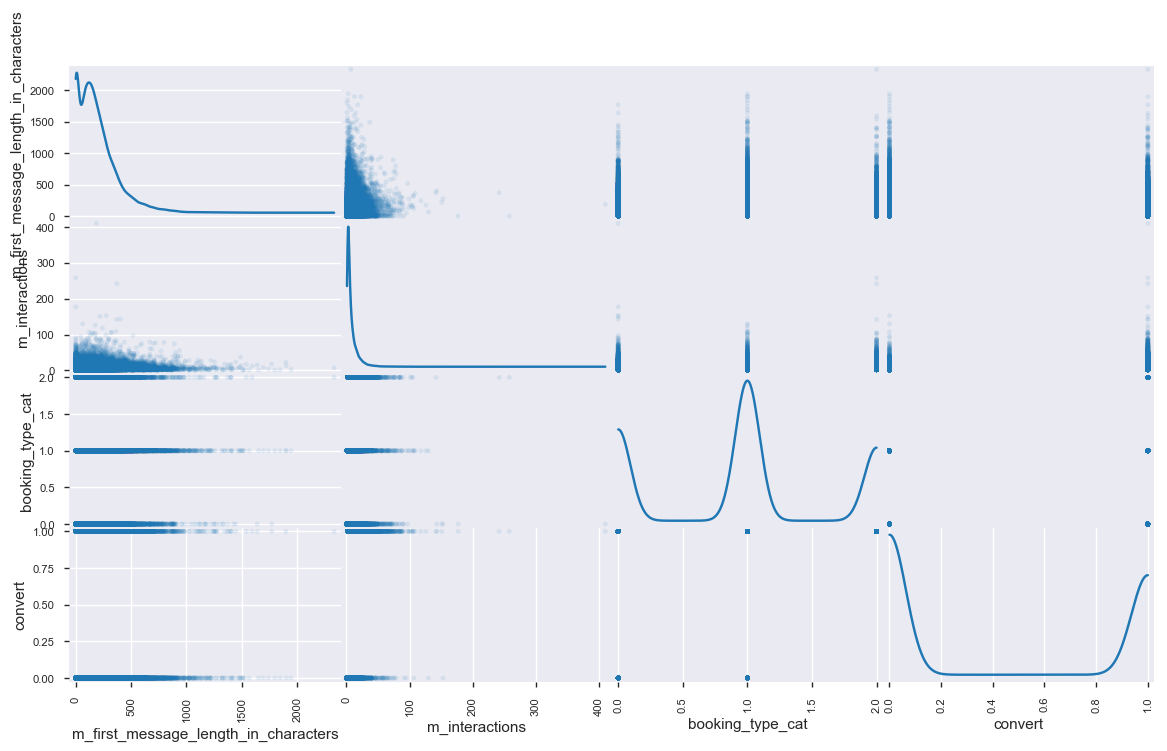

In [116]:
pd.plotting.scatter_matrix(df_contacts[['m_first_message_length_in_characters','m_interactions','booking_type_cat','convert']], alpha = 0.1, figsize = (14,8), diagonal = 'kde');

### Explore months that users start searching for listings

In [9]:
df_contacts['ts_interaction_first_month'] = pd.to_datetime(df_contacts['ts_interaction_first'])

In [10]:
df_contacts['ts_interaction_first_month'] =  df_contacts['ts_interaction_first_month'].dt.month

In [11]:
df_contacts['ts_interaction_first_month'].value_counts()

1    7618
6    4361
5    4304
2    4071
3    3817
4    3716
Name: ts_interaction_first_month, dtype: int64

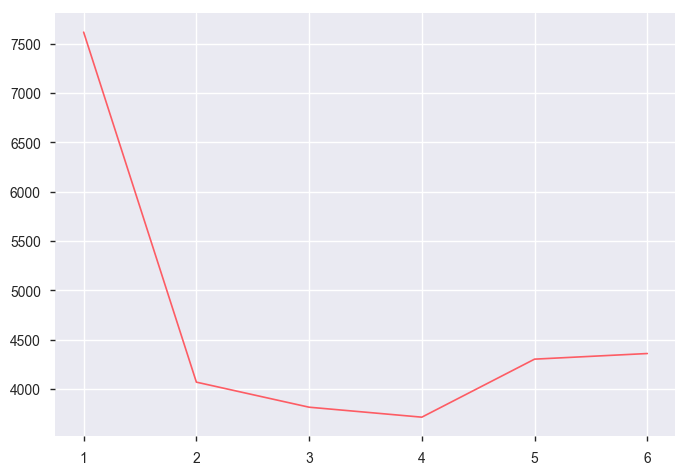

In [132]:
df_contacts.ts_interaction_first_month.value_counts(sort = False).plot(kind='line', linewidth=1.2, color='#FD5C64')

### Understand Desired travel start date, most popular travel time

In [12]:
df_contacts['ds_checkin_first_date'] = pd.to_datetime(df_contacts['ds_checkin_first'])

In [13]:
df_contacts['ds_checkin_first_date'].dt.year.value_counts()

2016    27562
2017    322  
2018    3    
Name: ds_checkin_first_date, dtype: int64

In [14]:
df_contacts['ds_checkin_first_date'].dt.month.value_counts()

8     9455
2     5185
3     2497
4     2385
5     2114
6     1811
7     1807
1     1365
12    638 
9     350 
10    176 
11    104 
Name: ds_checkin_first_date, dtype: int64

### most popular travel months

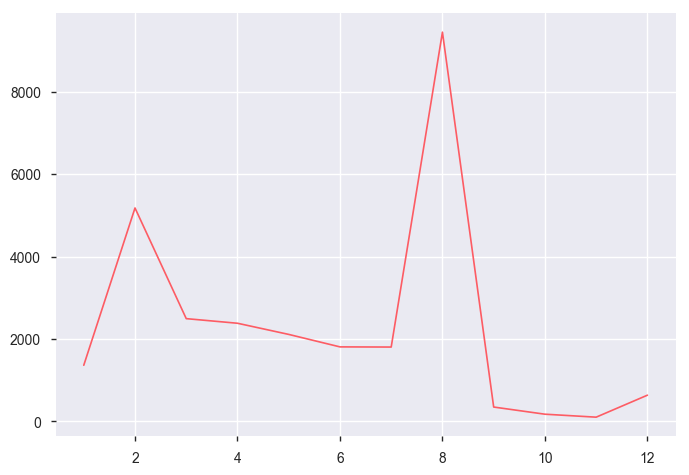

In [136]:
df_contacts['ds_checkin_first_date'].dt.month.value_counts(sort = False).plot(kind='line', linewidth=1.2, color='#FD5C64')

### Explore How long before a trip does users tend to book?
On average, about over a month

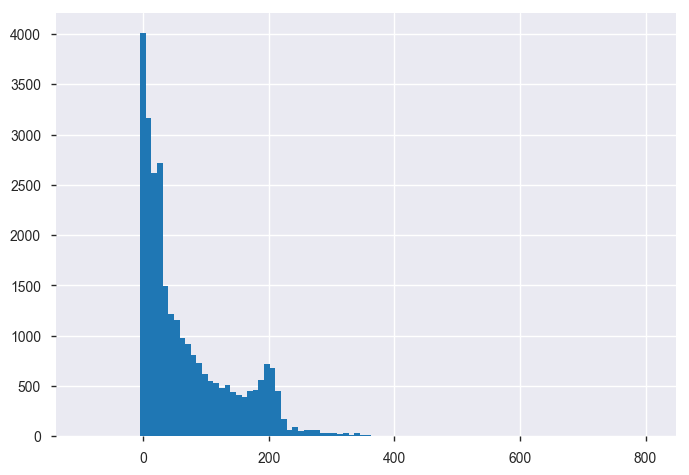

In [137]:
df_contacts['days_before_travel'] = pd.to_datetime(df_contacts['ds_checkin_first']) -  pd.to_datetime(df_contacts['ts_interaction_first'])
df_contacts['days_before_travel'] = df_contacts['days_before_travel'].dt.days
df_contacts['days_before_travel'].hist(bins = 100)

In [138]:
df_contacts['days_before_travel'][df_contacts['days_before_travel'] > 0].describe()

count    25831.000000
mean     74.640432   
std      73.037483   
min      1.000000    
25%      17.000000   
50%      46.000000   
75%      119.000000  
max      803.000000  
Name: days_before_travel, dtype: float64

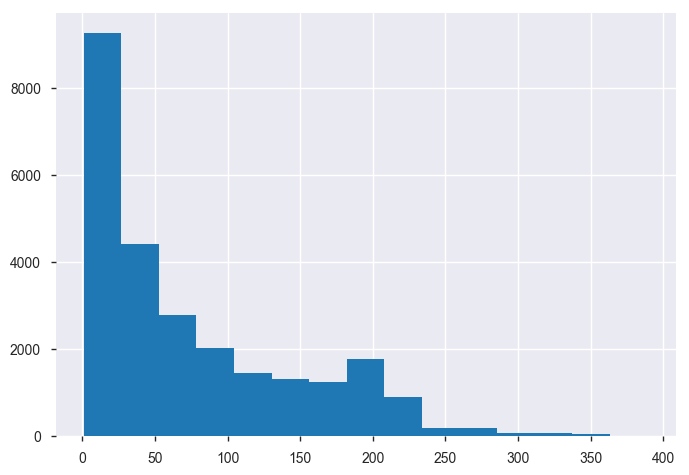

In [21]:
df_contacts['days_before_travel'][(df_contacts['days_before_travel'] > 0) & (df_contacts['days_before_travel'] < 400)].hist(bins = 15)

### Vecause there are days where desired travel date is before current date, there is negative values which is an error

In [139]:
df_contacts.loc[df_contacts['days_before_travel'] == -95 ]


,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,booking_type_cat,convert,ts_interaction_first_month,ds_checkin_first_date,days_before_travel,duration
21591,8ec5c7da-606d-4a6c-be76-d4c1520853d9,9b99260b-e073-47a1-a5f1-14caf7f5889c,ff288082-8c58-4f80-b648-707efa46e03e,2016-05-16 14:02:29,2016-05-16 14:06:15.0,NaN,NaN,2016-02-12,2016-02-19,4.0,3,82.0,contact_me,new,1,0,5,2016-02-12,-95,7


# For each of the booking method, count the % of bookings

In [15]:
c1 = df_contacts['contact_channel_first'].value_counts()

In [16]:
c2 = df_contacts['contact_channel_first'].loc[df_contacts['ts_booking_at'].notnull()].value_counts(sort = False)

### Try to plot the above

In [17]:
c3 = pd.concat([c1,c2],axis = 1)

In [18]:
c3.columns = ['total_contacts','total_bookings']

In [19]:
 c3['conversion_rate'] = (c3['total_bookings']/c3['total_contacts']).round(2)*100

In [20]:
c3

,total_contacts,total_bookings,conversion_rate
book_it,8366,3983,48.0
contact_me,12828,911,7.0
instant_book,6693,6693,100.0


# Count number of contact me that pre-approved user to book

In [21]:
df_contacts['contact_channel_first'][df_contacts['contact_channel_first']=='contact_me'].loc[df_contacts['ts_accepted_at_first'].notnull()].value_counts()

contact_me      5482
instant_book    0   
book_it         0   
Name: contact_channel_first, dtype: int64

### Host did not accept

In [22]:
df_contacts['contact_channel_first'].loc[df_contacts['ts_accepted_at_first'].isnull()].value_counts()

contact_me      7346
book_it         4126
instant_book    0   
Name: contact_channel_first, dtype: int64

### Host did not accept but sent free response back

In [150]:
df_contacts['contact_channel_first'].loc[df_contacts['ts_accepted_at_first'].isnull() & df_contacts['ts_reply_at_first'].notnull()].value_counts()

contact_me      6177
book_it         3263
instant_book    0   
Name: contact_channel_first, dtype: int64

### Host accept and user books (accept to book)

In [23]:
df_contacts['contact_channel_first'].loc[df_contacts['ts_accepted_at_first'].notnull() & df_contacts['ts_booking_at'].notnull()].value_counts()

instant_book    6693
book_it         3983
contact_me      911 
Name: contact_channel_first, dtype: int64

### Host pre-approve but user did not book

In [24]:
df_contacts['contact_channel_first'].loc[df_contacts['ts_accepted_at_first'].notnull() & df_contacts['ts_booking_at'].isnull()].value_counts()

contact_me      4571
book_it         257 
instant_book    0   
Name: contact_channel_first, dtype: int64

# Calculate duration of requested stay

In [25]:
df_contacts['ds_checkout_first'] = pd.to_datetime(df_contacts['ds_checkout_first'])
df_contacts['ds_checkin_first'] = pd.to_datetime(df_contacts['ds_checkin_first'])

In [26]:
df_contacts['duration'] = df_contacts['ds_checkout_first'] - df_contacts['ds_checkin_first']

In [27]:
df_contacts['duration'].describe()

count    27887                  
mean     7 days 12:40:02.667909 
std      14 days 05:16:02.977752
min      1 days 00:00:00        
25%      3 days 00:00:00        
50%      4 days 00:00:00        
75%      8 days 00:00:00        
max      365 days 00:00:00      
Name: duration, dtype: object

In [28]:
df_contacts['duration'] = df_contacts['duration'].dt.days 

In [29]:
df_contacts['duration'].head()

0    4
1    1
2    2
3    3
4    7
Name: duration, dtype: int64

Text(0.5,1,'Number of days')

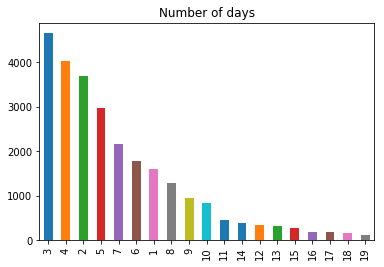

In [30]:
df_contacts['duration'].loc[df_contacts['duration'] < 20].value_counts().plot(kind = 'bar')
plt.title('Number of days')

Text(0.5,1,'for book_it only')

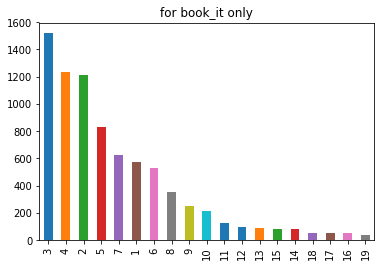

In [31]:
df_contacts['duration'].loc[(df_contacts['duration'] < 20) & (df_contacts['contact_channel_first'] == 'book_it')].value_counts().plot(kind = 'bar')
plt.title('for book_it only' )

Text(0.5,1,'for contact_me only')

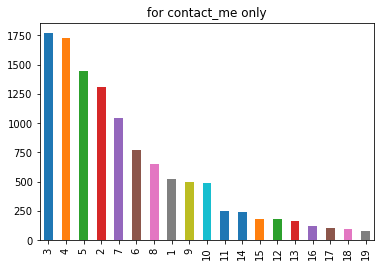

In [33]:
df_contacts['duration'].loc[(df_contacts['duration'] < 20) & (df_contacts['contact_channel_first'] == 'contact_me')].value_counts().plot(kind = 'bar')
plt.title('for contact_me only' )

Text(0.5,1,'for instant_book only')

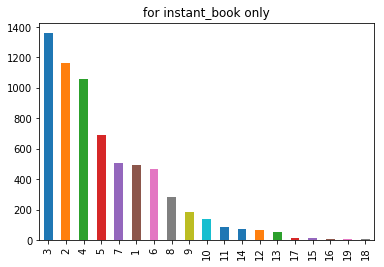

In [34]:
df_contacts['duration'].loc[(df_contacts['duration'] < 20) & (df_contacts['contact_channel_first'] == 'instant_book')].value_counts().plot(kind = 'bar')
plt.title('for instant_book only' )

# Calculate number of guests

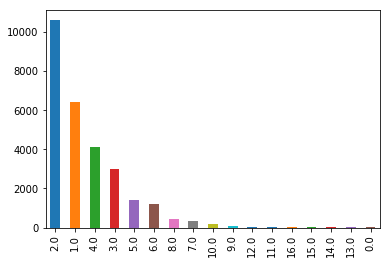

In [35]:
df_contacts['m_guests'].value_counts().plot(kind = 'bar')

### See if there is a relationship between number of guests and duration of stay

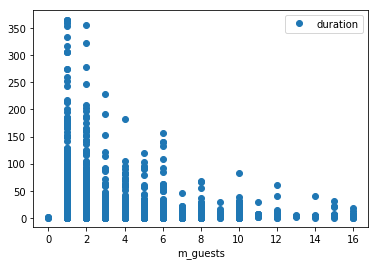

In [36]:
df_contacts.plot(x='m_guests', y='duration', style='o')

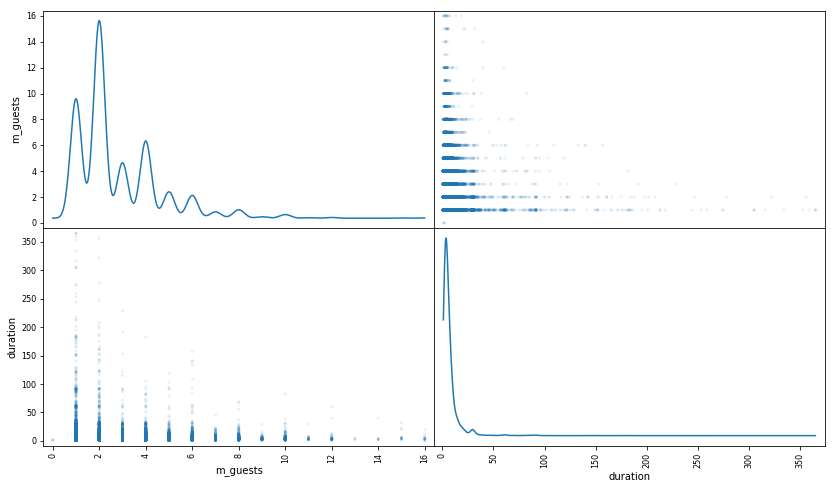

In [33]:
pd.plotting.scatter_matrix(df_contacts[['m_guests','duration']], alpha = 0.1, figsize = (14,8), diagonal = 'kde');

# Calculate relationship between message length and booking

In [38]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

Text(0,0.5,'number of bookings')

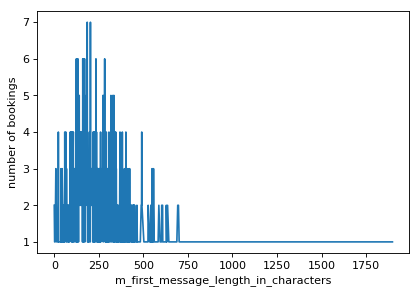

In [39]:
#for converts
df_contacts.loc[(df_contacts['contact_channel_first'] == 'contact_me') & (df_contacts['convert'] == 1)].groupby('m_first_message_length_in_characters').count()['id_guest_anon'].plot()
plt.ylabel('number of bookings')

### we are looking at ts_accepted first, not booking at, so dont use convert == 1. 

In [186]:
df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me') & \
                 (df_contacts_2['m_first_message_length_in_characters'] >= 1)\
                 & (df_contacts_2['ts_accepted_at_first'].notnull())]\
.groupby('m_first_message_length_in_characters').size().sort_values(ascending=False)

m_first_message_length_in_characters
129.0     29
133.0     27
224.0     27
146.0     26
124.0     24
160.0     23
113.0     23
186.0     23
86.0      23
122.0     23
105.0     23
117.0     23
177.0     22
132.0     22
130.0     21
141.0     21
164.0     21
99.0      21
92.0      21
94.0      21
100.0     21
96.0      21
131.0     21
114.0     21
119.0     21
151.0     21
128.0     21
107.0     20
202.0     20
168.0     20
120.0     20
126.0     20
185.0     20
184.0     20
161.0     20
80.0      19
87.0      19
74.0      19
153.0     19
111.0     19
110.0     19
139.0     19
203.0     19
108.0     19
215.0     19
97.0      19
180.0     18
144.0     18
123.0     18
73.0      18
231.0     18
63.0      18
145.0     18
138.0     18
143.0     18
142.0     18
204.0     18
169.0     18
170.0     18
172.0     18
101.0     18
135.0     18
140.0     18
93.0      17
155.0     17
217.0     17
64.0      17
53.0      17
242.0     17
233.0     17
243.0     17
262.0     17
159.0     17
183.0     17
1

In [185]:
x = df_contacts[(df_contacts['contact_channel_first']=='contact_me') & \
            (df_contacts['m_first_message_length_in_characters'] >= 1) &\
            (df_contacts['m_first_message_length_in_characters'] <= 750) &
                
            (df_contacts['ts_accepted_at_first'].notnull())].groupby('m_first_message_length_in_characters').size().sort_values(ascending=False)
x.head()

m_first_message_length_in_characters
129.0    29
224.0    27
133.0    27
146.0    26
124.0    24
dtype: int64

,msg_len,count_b
0,0.0,2
1,2.0,1
2,4.0,1
3,5.0,1
4,9.0,3


,msg_len,count_c
150,150.0,47
151,151.0,58
152,152.0,45
153,153.0,43
154,154.0,40
155,155.0,42
156,156.0,43
157,157.0,31
158,158.0,40
159,159.0,42


,msg_len,count_b,count_c
145,181.0,3,38
146,183.0,5,43
147,184.0,3,39
148,185.0,7,31
149,186.0,2,47
150,187.0,1,27
151,188.0,1,27
152,189.0,2,34
153,190.0,3,31
154,191.0,1,33


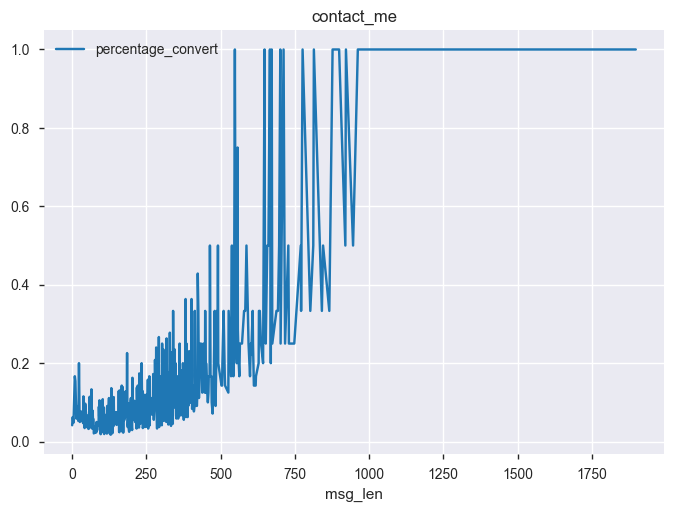

In [180]:
#contact me users who have converted
a_msg = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me') & (df_contacts_2['convert'] == 1) ].groupby('m_first_message_length_in_characters').size()
b_msg = pd.DataFrame(a_msg)
b_msg.reset_index(inplace=True)
b_msg.columns = ['msg_len','count_b']
b_msg.head()
# total numbr of contact_me users
c_msg = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me')].groupby('m_first_message_length_in_characters').size()
c_msg = pd.DataFrame(c_msg)
c_msg.reset_index(inplace=True)
c_msg.columns = ['msg_len','count_c']
c_msg[150:250]
d_msg = pd.merge(b_msg,c_msg, on = 'msg_len',how = 'inner')
d_msg[145:250]
#for each group of number of reviews, find the number of converts. 
d_msg['percentage_convert'] = d_msg['count_b']/d_msg['count_c']
d_msg.plot(x = 'msg_len',y = 'percentage_convert',title='contact_me')

In [174]:
d_msg['percentage_convert'].describe()

count    467.000000
mean     0.170834  
std      0.209289  
min      0.018182  
25%      0.057418  
50%      0.096774  
75%      0.193750  
max      1.000000  
Name: percentage_convert, dtype: float64

In [168]:
df_contacts_2['m_first_message_length_in_characters'].loc[(df_contacts_2['contact_channel_first'] == 'contact_me')& (df_contacts_2['convert'] == 1)].value_counts().head()

185.0    7
203.0    7
160.0    6
133.0    6
234.0    6
Name: m_first_message_length_in_characters, dtype: int64

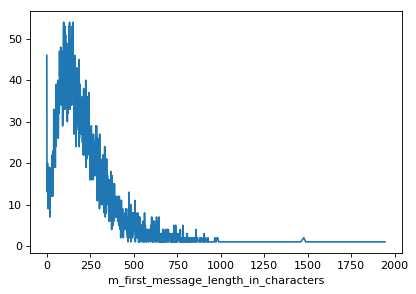

In [40]:
#for non-converts
df_contacts.loc[(df_contacts['contact_channel_first'] == 'contact_me') & (df_contacts['convert'] == 0)].groupby('m_first_message_length_in_characters').count()['id_guest_anon'].plot()

In [43]:
df_contacts.loc[(df_contacts['contact_channel_first'] == 'contact_me') & (df_contacts['convert'] == 0)].groupby('m_first_message_length_in_characters').size()

m_first_message_length_in_characters
0.0       46
1.0       16
2.0       15
3.0       13
4.0       20
5.0       16
6.0       13
7.0       16
8.0       9 
9.0       15
10.0      15
11.0      11
12.0      19
13.0      15
14.0      16
15.0      10
16.0      10
17.0      14
18.0      7 
19.0      8 
20.0      17
21.0      18
22.0      16
23.0      16
24.0      14
25.0      15
26.0      19
27.0      17
28.0      14
29.0      16
          ..
1205.0    1 
1212.0    1 
1216.0    1 
1219.0    1 
1221.0    1 
1230.0    1 
1264.0    1 
1318.0    1 
1324.0    1 
1350.0    1 
1372.0    1 
1398.0    1 
1404.0    1 
1409.0    1 
1415.0    1 
1460.0    1 
1478.0    2 
1489.0    1 
1496.0    1 
1507.0    1 
1509.0    1 
1521.0    1 
1566.0    1 
1651.0    1 
1693.0    1 
1741.0    1 
1798.0    1 
1846.0    1 
1901.0    1 
1945.0    1 
Length: 911, dtype: int64

In [44]:
df_contacts.loc[(df_contacts['contact_channel_first'] == 'contact_me') & (df_contacts['convert'] == 0)].groupby('m_first_message_length_in_characters').count()['id_guest_anon']

m_first_message_length_in_characters
0.0       46
1.0       16
2.0       15
3.0       13
4.0       20
5.0       16
6.0       13
7.0       16
8.0       9 
9.0       15
10.0      15
11.0      11
12.0      19
13.0      15
14.0      16
15.0      10
16.0      10
17.0      14
18.0      7 
19.0      8 
20.0      17
21.0      18
22.0      16
23.0      16
24.0      14
25.0      15
26.0      19
27.0      17
28.0      14
29.0      16
          ..
1205.0    1 
1212.0    1 
1216.0    1 
1219.0    1 
1221.0    1 
1230.0    1 
1264.0    1 
1318.0    1 
1324.0    1 
1350.0    1 
1372.0    1 
1398.0    1 
1404.0    1 
1409.0    1 
1415.0    1 
1460.0    1 
1478.0    2 
1489.0    1 
1496.0    1 
1507.0    1 
1509.0    1 
1521.0    1 
1566.0    1 
1651.0    1 
1693.0    1 
1741.0    1 
1798.0    1 
1846.0    1 
1901.0    1 
1945.0    1 
Name: id_guest_anon, Length: 911, dtype: int64

In [61]:
df_contacts.loc[(df_contacts['contact_channel_first'] == 'contact_me') & (df_contacts['convert'] == 0)]['m_first_message_length_in_characters'].value_counts()

131.0     54
151.0     54
97.0      54
105.0     53
128.0     53
146.0     53
96.0      52
108.0     51
100.0     51
141.0     50
129.0     50
139.0     49
114.0     49
117.0     48
95.0      48
124.0     48
80.0      48
73.0      47
113.0     47
86.0      47
89.0      46
106.0     46
161.0     46
0.0       46
112.0     46
87.0      45
136.0     45
186.0     45
150.0     45
110.0     45
          ..
651.0      1
538.0      1
595.0      1
1101.0     1
935.0      1
1199.0     1
676.0      1
1201.0     1
791.0      1
1318.0     1
906.0      1
1566.0     1
1741.0     1
530.0      1
953.0      1
826.0      1
1181.0     1
678.0      1
1169.0     1
871.0      1
813.0      1
549.0      1
745.0      1
752.0      1
528.0      1
880.0      1
1011.0     1
901.0      1
1372.0     1
1031.0     1
Name: m_first_message_length_in_characters, Length: 911, dtype: int64

# Lets look at listings data

In [45]:
df_listing = pd.read_csv('listings.csv')

In [46]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14614 entries, 0 to 14613
Data columns (total 4 columns):
id_listing_anon         14614 non-null object
room_type               14614 non-null object
listing_neighborhood    14614 non-null object
total_reviews           14614 non-null float64
dtypes: float64(1), object(3)
memory usage: 456.8+ KB


In [47]:
pandas_profiling.ProfileReport(df_listing)

Number of variables,4
Number of observations,14614
Total Missing (%),0.0%
Total size in memory,456.8 KiB
Average record size in memory,32.0 B
Numeric,1
Categorical,2
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [48]:
# % of faulty negative reviews
df_listing.loc[df_listing['total_reviews'] < 0].count()['id_listing_anon']/len(df_listing)*100

0.26686738743670452

In [59]:
df_listing['listing_neighborhood'].value_counts()

-unknown-                   7397
Copacabana                  2646
Ipanema                     1088
Barra da Tijuca             616 
Leblon                      477 
Botafogo                    369 
Santa Teresa                251 
Flamengo                    182 
Leme                        181 
Lapa                        180 
Recreio dos Bandeirantes    165 
Laranjeiras                 130 
Tijuca                      98  
Lagoa                       73  
Glória                      68  
Catete                      62  
Jardim Botânico             62  
Gávea                       60  
Centro                      57  
Humaitá                     50  
Vila Isabel                 39  
Vidigal                     39  
Maracanã                    39  
São Conrado                 33  
Urca                        30  
Rio Comprido                28  
Cosme Velho                 21  
Praça da Bandeira           13  
Estacio                     13  
São Cristóvão               12  
          

# Now lets explore the users data

In [60]:
df_users = pd.read_csv('users.csv')

In [61]:
df_users.head()

,id_user_anon,country,words_in_user_profile
0,fa7a031b-52ba-4eb8-b762-425729ceac58,US,0
1,238f0d56-8574-4def-aa4e-994d704ade91,IL,0
2,145a014b-0ea1-43f1-96a0-b160282e866f,BR,0
3,39fe1ba8-ec47-48f2-8149-4d2aea845896,BR,0
4,2ccb8c14-29b2-40b3-8430-e3ac87826239,BR,0


In [51]:
pandas_profiling.ProfileReport(df_users)

Number of variables,3
Number of observations,36778
Total Missing (%),0.0%
Total size in memory,862.1 KiB
Average record size in memory,24.0 B
Numeric,1
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [62]:
df_users = df_users.drop_duplicates()

In [63]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31457 entries, 0 to 36777
Data columns (total 3 columns):
id_user_anon             31457 non-null object
country                  31456 non-null object
words_in_user_profile    31457 non-null int64
dtypes: int64(1), object(2)
memory usage: 983.0+ KB


In [64]:
# How many users fill out profile
df_users.loc[(df_users['words_in_user_profile'] > 0) & (df_users['country']=='BR')].count()['id_user_anon']/len(df_users) *100

31.268080236513335

# Lets join the listing data to contacts data

### We will use a left join because there are multiple contacts about the same listing in the contacts table. 

In [65]:
df_contacts_1 = pd.merge(df_contacts, df_listing, on='id_listing_anon', how='left')
df_contacts_2 = pd.merge(df_contacts_1, df_users, left_on = 'id_guest_anon', right_on = 'id_user_anon')

In [66]:
df_contacts_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 0 to 27886
Data columns (total 25 columns):
id_guest_anon                           27887 non-null object
id_host_anon                            27887 non-null object
id_listing_anon                         27887 non-null object
ts_interaction_first                    27887 non-null object
ts_reply_at_first                       25855 non-null object
ts_accepted_at_first                    16415 non-null object
ts_booking_at                           11587 non-null object
ds_checkin_first                        27887 non-null datetime64[ns]
ds_checkout_first                       27887 non-null datetime64[ns]
m_guests                                27886 non-null float64
m_interactions                          27887 non-null int64
m_first_message_length_in_characters    27887 non-null float64
contact_channel_first                   27887 non-null category
guest_user_stage_first                  27887 non-null object
book

### Lets look at listing reviews. Does having more reviews increase booking?
Hard to say, needs investigation with data first

contact me users. 
This is an un-normalized curve below. There is more hosts with 0 reviews to begin with, so naturally they will have more bookings. To normalize, we must first group users into each of the number of reviews group. Example, hosts with 0 reviews, hosts with 1 reviews....
After that, for each grouping, find the % of hosts that got bookings. This is normalized for each group.

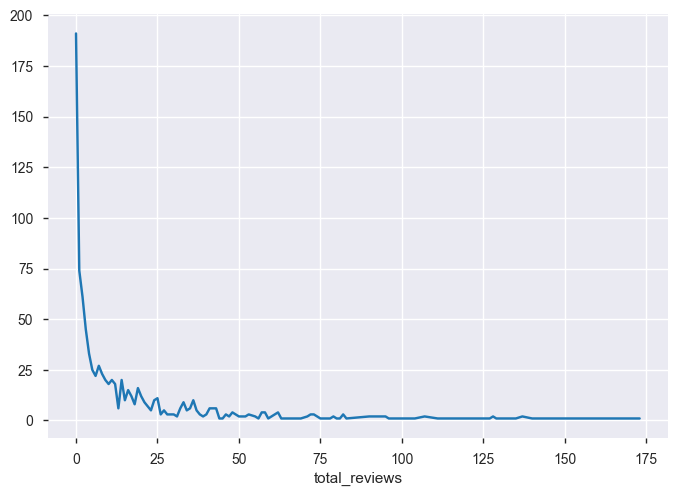

In [55]:
df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me') & (df_contacts_2['convert'] == 1) & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').count()['id_guest_anon'].plot()

perform normalization for contact_me users

,total_reviews,count_b
0,0.0,191
1,1.0,74
2,2.0,61
3,3.0,45
4,4.0,33


,total_reviews,count_c
0,0.0,5253
1,1.0,1519
2,2.0,890
3,3.0,513
4,4.0,418


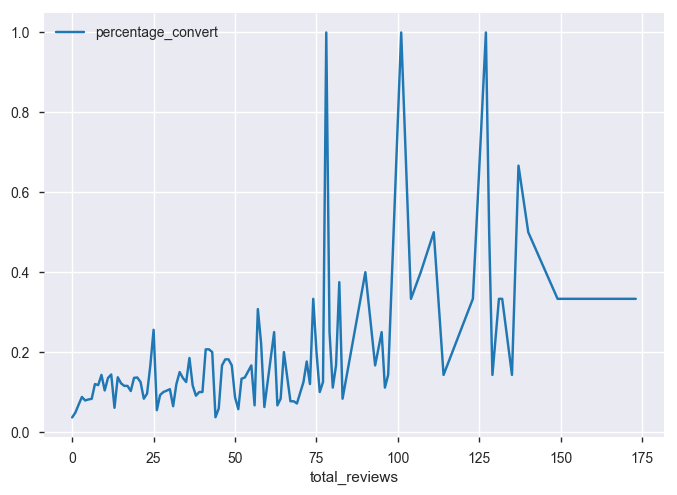

In [137]:
#contact me users who have converted
a_reviews = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me') & (df_contacts_2['convert'] == 1) & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').size()
b_reviews = pd.DataFrame(a_reviews)
b_reviews.reset_index(inplace=True)
b_reviews.columns = ['total_reviews','count_b']
b_reviews.head()
# total numbr of contact_me users
c_reviews = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me') & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').size()
c_reviews = pd.DataFrame(c_reviews)
c_reviews.reset_index(inplace=True)
c_reviews.columns = ['total_reviews','count_c']
c_reviews.head()
d_reviews = pd.merge(b_reviews,c_reviews, on = 'total_reviews',how = 'inner')
#for each group of number of reviews, find the number of converts. 
d_reviews['percentage_convert'] = d_reviews['count_b']/d_reviews['count_c']
d_reviews.plot(x = 'total_reviews',y = 'percentage_convert')

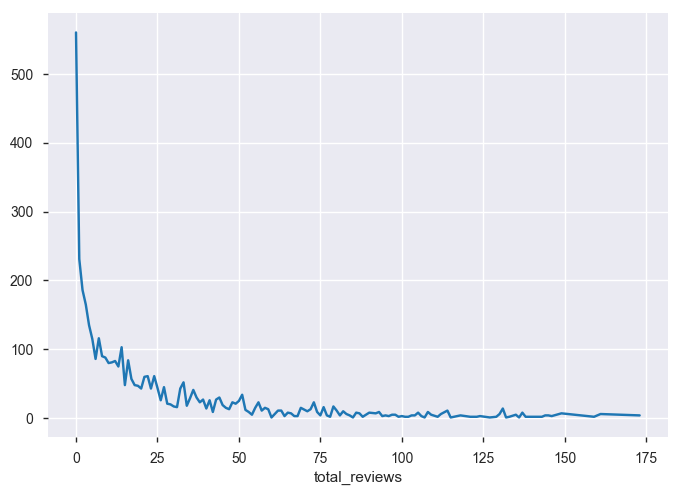

In [58]:
#book_it users
df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'book_it') & (df_contacts_2['convert'] == 1) & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').count()['id_guest_anon'].plot()

,total_reviews,count_b
0,0.0,560
1,1.0,231
2,2.0,186
3,3.0,165
4,4.0,135


,total_reviews,count_c
0,0.0,2276
1,1.0,772
2,2.0,443
3,3.0,412
4,4.0,267


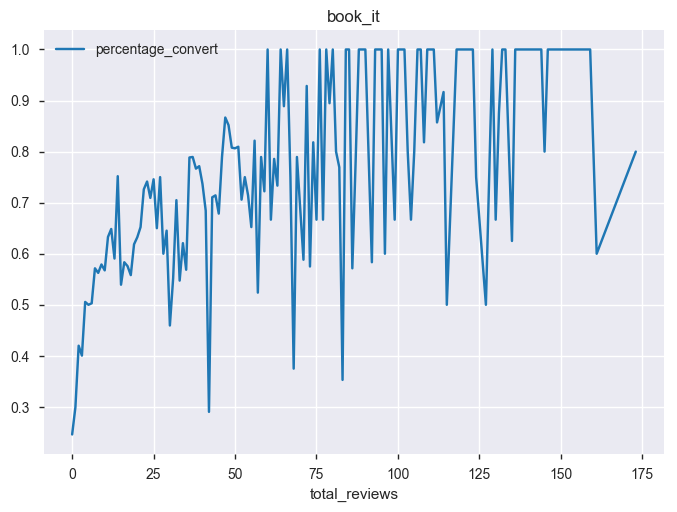

In [138]:
#book it users who have converted
a_reviews = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'book_it') & (df_contacts_2['convert'] == 1) & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').size()
b_reviews = pd.DataFrame(a_reviews)
b_reviews.reset_index(inplace=True)
b_reviews.columns = ['total_reviews','count_b']
b_reviews.head()
# total numbr of contact_me users
c_reviews = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'book_it') & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').size()
c_reviews = pd.DataFrame(c_reviews)
c_reviews.reset_index(inplace=True)
c_reviews.columns = ['total_reviews','count_c']
c_reviews.head()
d_reviews = pd.merge(b_reviews,c_reviews, on = 'total_reviews',how = 'inner')
#for each group of number of reviews, find the number of converts. 
d_reviews['percentage_convert'] = d_reviews['count_b']/d_reviews['count_c']
d_reviews.plot(x = 'total_reviews',y = 'percentage_convert',title='book_it')

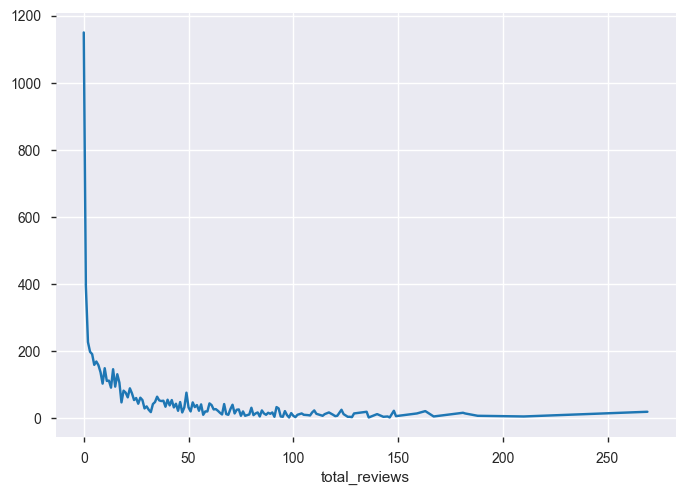

In [169]:
#instant book users
df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'instant_book') & (df_contacts_2['convert'] == 1) & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').count()['id_guest_anon'].plot()

,total_reviews,count_b
0,0.0,1150
1,1.0,393
2,2.0,226
3,3.0,197
4,4.0,190


,total_reviews,count_c
0,0.0,1150
1,1.0,393
2,2.0,226
3,3.0,197
4,4.0,190


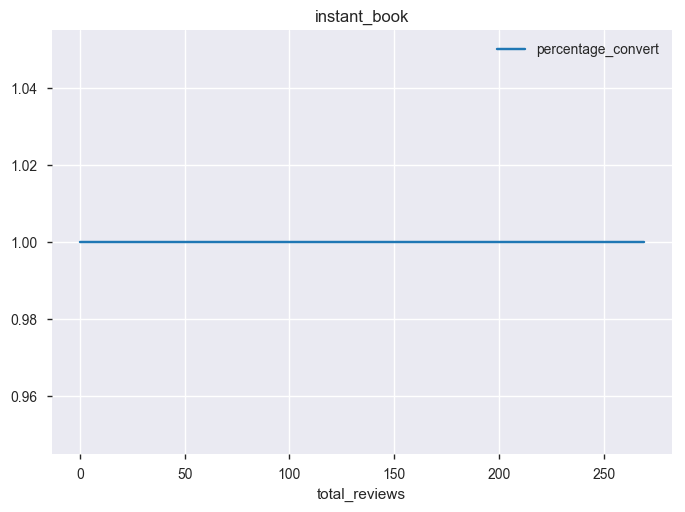

In [140]:
#instant book users who have converted
a_reviews = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'instant_book') & (df_contacts_2['convert'] == 1) & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').size()
b_reviews = pd.DataFrame(a_reviews)
b_reviews.reset_index(inplace=True)
b_reviews.columns = ['total_reviews','count_b']
b_reviews.head()
# total numbr of instant_book users
c_reviews = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'instant_book') & (df_contacts_2['total_reviews'] >= 0)].groupby('total_reviews').size()
c_reviews = pd.DataFrame(c_reviews)
c_reviews.reset_index(inplace=True)
c_reviews.columns = ['total_reviews','count_c']
c_reviews.head()
d_reviews = pd.merge(b_reviews,c_reviews, on = 'total_reviews',how = 'inner')
#for each group of number of reviews, find the number of converts. 
d_reviews['percentage_convert'] = d_reviews['count_b']/d_reviews['count_c']
d_reviews.plot(x = 'total_reviews',y = 'percentage_convert',title='instant_book')

In [78]:
df_contacts_2['total_reviews'].value_counts()

 0.0      8679
 1.0      2684
 2.0      1559
 3.0      1122
 4.0       875
 5.0       695
 6.0       604
 7.0       585
 8.0       492
 10.0      462
 14.0      428
 16.0      404
 9.0       394
 11.0      386
 12.0      364
 13.0      316
 17.0      308
 19.0      275
 15.0      264
 22.0      256
 20.0      231
 21.0      225
 18.0      210
 24.0      199
 33.0      196
 23.0      183
 27.0      174
 35.0      162
 25.0      161
 36.0      158
          ... 
-53.0        7
 120.0       6
-4.0         6
 138.0       6
 210.0       6
 127.0       6
 133.0       5
-25.0        5
 101.0       5
-12.0        4
 167.0       4
 132.0       4
-11.0        4
 144.0       4
 78.0        3
 113.0       3
-24.0        3
-7.0         3
 106.0       3
-13.0        3
 126.0       3
-2.0         2
 136.0       2
-5.0         2
-15.0        2
-9.0         1
-74.0        1
-46.0        1
 116.0       1
-10.0        1
Name: total_reviews, Length: 172, dtype: int64

### For users that have filled out their profile, do they tend to get more bookings?

In [116]:
df_contacts_2['words_in_user_profile'].value_counts().head()

0     16861
1     4671 
9     168  
13    166  
11    151  
Name: words_in_user_profile, dtype: int64

Text(0.5,1,'number of users that converted')

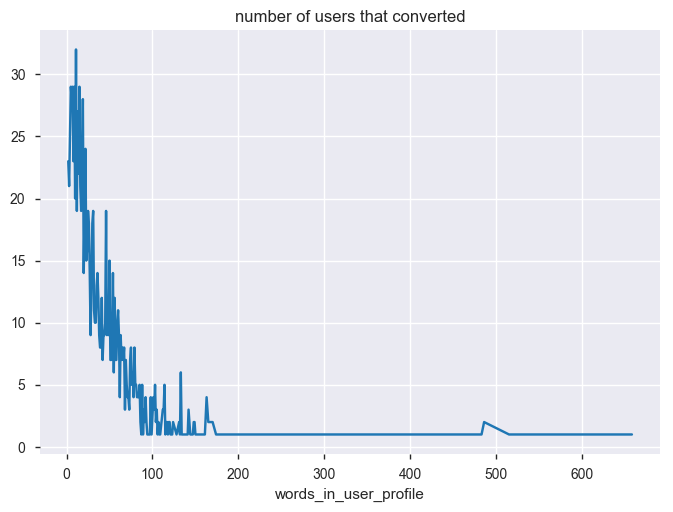

In [172]:
df_contacts_2.loc[(df_contacts_2['contact_channel_first'].isin(['contact_me','book_it']))\
                  & (df_contacts_2['convert'] == 1)
                  & (df_contacts_2['words_in_user_profile'] > 1 )]\
.groupby('words_in_user_profile').size().plot()
plt.title('number of users that converted')

The above chart is not normalized to how many users there are for each number of words in user profile.
There are much more people with 0 words in their profile so there is also higher chance mroe people with 0 words get booked. We want to normalize this and see what percentage of users for each category (number of words in user profile) get bookings. Hypothesis is, as 'words in profile' increase, percentage of people for each (number of words in user profile category) will also increase. 

In [105]:
a = df_contacts_2.loc[(df_contacts_2['contact_channel_first'].isin(['contact_me','book_it']))\
                  & (df_contacts_2['convert'] == 1)]\
.groupby('words_in_user_profile').size()

In [ ]:
b = pd.DataFrame(a,columns=['count_a'])
b = b.reset_index()
b.columns
b

Index(['words_in_user_profile', 'count_c'], dtype='object')

,words_in_user_profile,count_a,count_c
0,0,2852,16861
1,1,816,4671
2,2,23,142
3,3,21,134
4,4,25,136


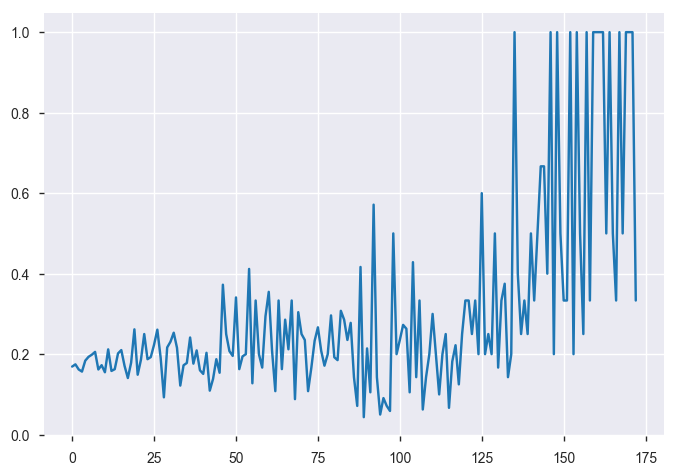

In [115]:
c = pd.DataFrame(df_contacts_2['words_in_user_profile'].value_counts())
c = c.reset_index()
c.columns=['words_in_user_profile', 'count_c']
c.columns
d = pd.merge(b,c, on = 'words_in_user_profile', how = 'inner' )
d.head()
d['percent_convert'] = d['count_a']/d['count_c']
d['percent_convert'].plot()

Text(0.5,1,'Number of users who did not convert')

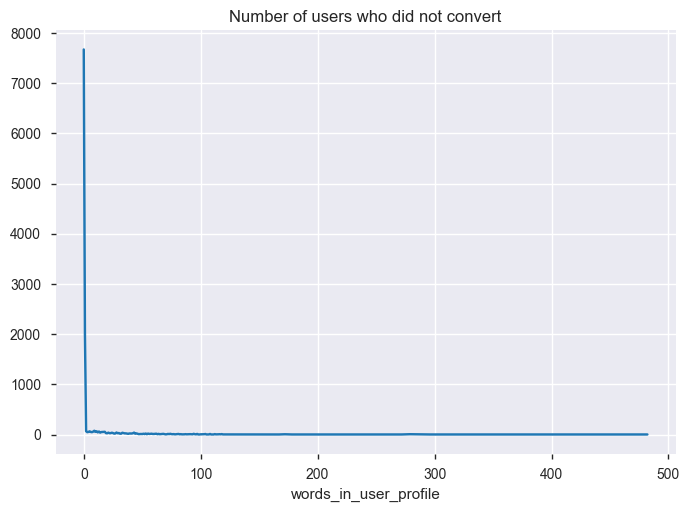

In [171]:
df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me') \
                  & (df_contacts_2['convert'] == 0)\
                 & (df_contacts_2['convert'] == 0)]\
.groupby('words_in_user_profile').size().plot()
plt.title("Number of users who did not convert")

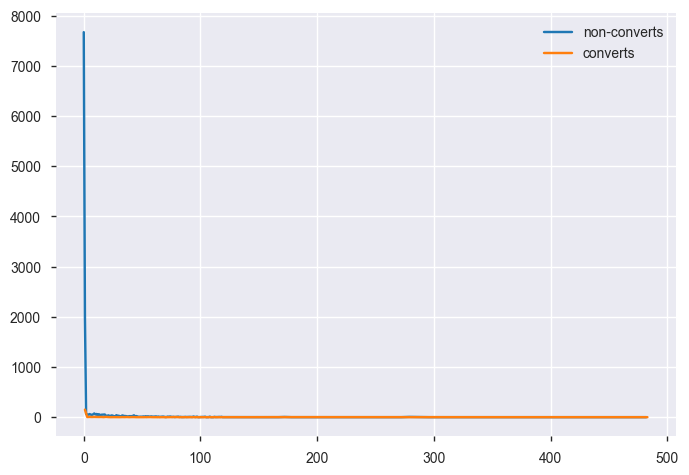

In [499]:
x = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me') \
                  & (df_contacts_2['convert'] == 0)]\
.groupby('words_in_user_profile').size()

y = df_contacts_2.loc[(df_contacts_2['contact_channel_first'] == 'contact_me') \
                  & (df_contacts_2['convert'] == 1)
                     & df_contacts_2['words_in_user_profile'] > 0 ]\
.groupby('words_in_user_profile').size()

# ax = plt.plot()
fig = plt.figure()
ax = fig.gca()
ax.plot(x)
ax.plot(y)
ax.legend(['non-converts','converts'])



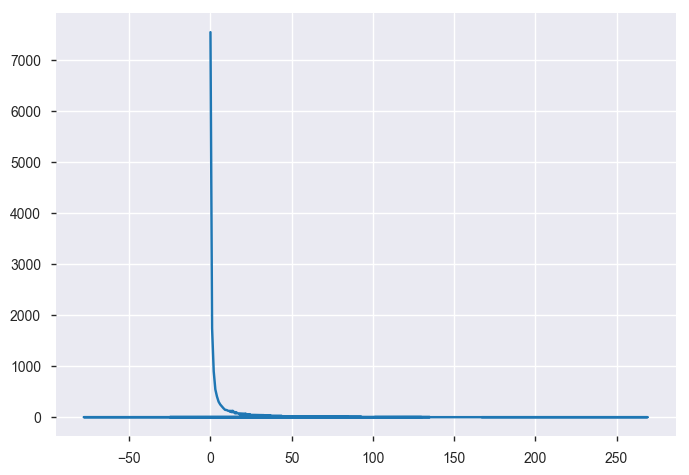

In [139]:
df_listing.total_reviews.value_counts().plot()

In [95]:
#how many of the reviews are negative out of total number of contact?
df_contacts_2.loc[df_contacts_2['total_reviews'] < 0].count()['id_guest_anon']

92

### Explore listings data

In [116]:
#listings with the most bookings
df_contacts_2.loc[df_contacts_2['convert'] == 1].groupby('id_listing_anon').count()['id_guest_anon'].sort_values(ascending = False)

id_listing_anon
dad04c9b-2617-4a65-b482-a2334101f021    22
414803ce-43d9-4da6-999c-3d9675450049    20
8cce636c-41e4-494f-947c-8e1e2d6abccf    19
04364550-b6b8-43c6-a948-6ddfcc0fa2e8    18
6ccefdc4-042e-468b-8d9c-7b6109db5be8    18
77b09acc-9bc4-4843-9911-e76f4a73d142    18
75de5296-f7df-45d2-9c18-af332a082784    17
f11b5696-331e-4572-b16a-c93300e8670f    17
a1765d36-e902-4c14-933e-e287fdce7b47    16
6674292a-bc09-4be4-a4df-bf710ec93463    16
1bea71fc-f7e2-43b2-b6ec-f6ef948b8427    16
572e0458-a930-4446-8e1a-04ae0d950232    16
f6e9e312-f00a-48fc-874b-9a164d7b359f    16
17906ab9-6f0d-4a54-95f2-37adfa2af68f    16
645781c2-553d-4052-a72c-aa19ce5dd025    16
ead9b36a-1b42-4b2d-a367-baf27dc0251d    15
4483babe-207d-4968-80a9-75da6c49743b    15
cbce4daa-28e7-4943-a229-65b8d342a58b    15
f72bb81c-e98f-4b0a-9bcc-b913f480e444    15
35dc8c55-7998-41ed-bda7-48b09ea14761    15
a2761211-c11b-40e4-8e85-3f0c6b9416e1    15
c38ced94-2aba-4bcc-9e3a-8eea2b4b88c4    15
8ef8a869-0cb1-4d7a-bd03-dc42ce88aa5e  

# Lets look at message length and host acceptance and user profile
There should not be 0 message length where booking type is contact me. Unless they booked with book_it after. 

In [87]:
# for message length == 0 in contact me first method and managed to book, did their user profile have info?
df_contacts_2.loc[(df_contacts_2['convert'] == 1) \
                  & (df_contacts_2['contact_channel_first'] == 'book_it')\
                  & (df_contacts_2['guest_user_stage_first'] == 'past_booker')
#                  & (df_contacts_2['m_first_message_length_in_characters'] == 0)]\
                 ].groupby('words_in_user_profile').size()[:10]

words_in_user_profile
0    889
1    380
2     13
3     13
4     17
5     19
6     18
7     19
8     17
9     17
dtype: int64

# Lets look at country travellers are coming from and whether they prefer the various types of booking methods, room_types and listing_neighborhoods

In [189]:
df_contacts_2.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,booking_type_cat,convert,ts_interaction_first_month,ds_checkin_first_date,duration,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
0,1630694d-6e19-463c-a5b9-bc5171322487,97fa1946-b2ac-41bd-854b-0039dc911495,e1f83a70-a590-4a2c-a138-6505f3e3de48,2016-01-17 13:33:32,2016-01-17 13:36:15.0,NaN,NaN,2016-02-06,2016-02-10,2.0,5,80.0,contact_me,new,1,0,1,2016-02-06,4,Private room,Leme,130.0,1630694d-6e19-463c-a5b9-bc5171322487,BR,0
1,949d0029-4349-4611-9f78-a1990d48ff4a,7bb459cb-3b97-48e9-ba87-309e9dc809c7,b8ece1d0-ed4e-4def-a845-f3cb9f9c6d80,2016-03-15 01:00:48,2016-03-15 12:54:47.0,NaN,NaN,2016-03-18,2016-03-19,2.0,2,0.0,book_it,past_booker,0,0,3,2016-03-18,1,Entire home/apt,-unknown-,0.0,949d0029-4349-4611-9f78-a1990d48ff4a,BR,37
2,949d0029-4349-4611-9f78-a1990d48ff4a,a998ab84-1c32-4a99-8f48-6b35f2d95ed0,e3811d7e-c5e8-4d10-a824-7f4dbd4ec45d,2016-03-14 18:16:09,2016-03-14 23:44:06.0,NaN,NaN,2016-03-18,2016-03-19,2.0,4,0.0,book_it,past_booker,0,0,3,2016-03-18,1,Entire home/apt,Copacabana,61.0,949d0029-4349-4611-9f78-a1990d48ff4a,BR,37
3,4d94ee7f-fd1e-4528-97ac-cf25335b15e5,b15572ec-7a34-4062-8d89-e2906b1a8a31,b4f23a9f-197b-4b3e-95fd-d5d759b11b0b,2016-04-16 22:16:19,2016-04-17 16:07:07.0,2016-04-17 19:40:47.0,NaN,2016-06-03,2016-06-05,2.0,5,44.0,contact_me,past_booker,1,0,4,2016-06-03,2,Entire home/apt,-unknown-,0.0,4d94ee7f-fd1e-4528-97ac-cf25335b15e5,BR,0
4,4d94ee7f-fd1e-4528-97ac-cf25335b15e5,f49708dc-7218-4f9a-a1f5-070e927d7032,3dd9d30a-c531-474a-9fc1-bc44b63190ac,2016-04-17 20:20:42,2016-04-17 20:28:52.0,2016-04-18 12:01:15.0,2016-04-21 20:34:47.0,2016-06-03,2016-06-05,2.0,19,38.0,contact_me,past_booker,1,1,4,2016-06-03,2,Private room,Ipanema,0.0,4d94ee7f-fd1e-4528-97ac-cf25335b15e5,BR,0


In [218]:
df_contacts_2['country'].value_counts()

BR    13613
US     3413
AR     2326
FR     1333
GB     1163
DE      699
CL      497
AU      449
CA      444
NL      317
CO      294
IT      272
ES      270
CH      262
UY      246
MX      210
PE      145
PT      124
BE      112
DK       92
RU       88
SE       83
CN       80
IL       80
NZ       79
IE       78
NO       78
AT       61
FI       55
ZA       52
      ...  
SV        2
BB        2
HN        2
KY        2
SR        2
AW        2
NG        2
LB        2
BM        2
JO        2
GE        1
FJ        1
MU        1
GU        1
UG        1
MK        1
VI        1
VN        1
PF        1
MN        1
LK        1
AZ        1
LY        1
BZ        1
NC        1
CD        1
OM        1
MZ        1
IQ        1
GH        1
Name: country, Length: 121, dtype: int64

In [91]:
tmp = df_contacts_2[['country','contact_channel_first']][(df_contacts_2['country'] == 'US') | (df_contacts_2['country'] == 'BR')]

### Lets look at for month = august, what is the fav locations, vs month = 2

In [ ]:
df_contacts['ds_checkin_first_date'].dt.month.value_counts(sort = False).plot(kind='line', linewidth=1.2, color='#FD5C64')

In [205]:
df_contacts_2['listing_neighborhood'][(df_contacts_2['ds_checkin_first_date'].dt.month == 2) & (df_contacts_2['country'] == 'US')].value_counts()

-unknown-                   200
Copacabana                  131
Ipanema                     102
Leblon                      28 
Santa Teresa                16 
Leme                        12 
Botafogo                    11 
Centro                      6  
Flamengo                    6  
Lapa                        5  
Laranjeiras                 4  
Urca                        3  
Vidigal                     3  
Glória                      3  
Jardim Botânico             2  
Gávea                       2  
Barra da Tijuca             2  
Cosme Velho                 2  
Lagoa                       2  
Estacio                     1  
Méier                       1  
Catete                      1  
Recreio dos Bandeirantes    1  
Andaraí                     1  
Praça da Bandeira           1  
Rio Comprido                1  
Tijuca                      1  
Humaitá                     1  
Name: listing_neighborhood, dtype: int64

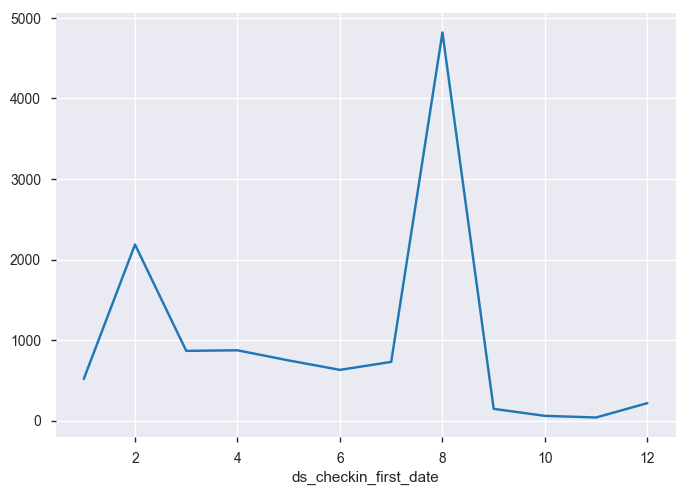

In [212]:
df_contacts_2['listing_neighborhood'].loc[df_contacts_2['listing_neighborhood'] == '-unknown-'].groupby(df_contacts_2['ds_checkin_first_date'].dt.month).size().plot()

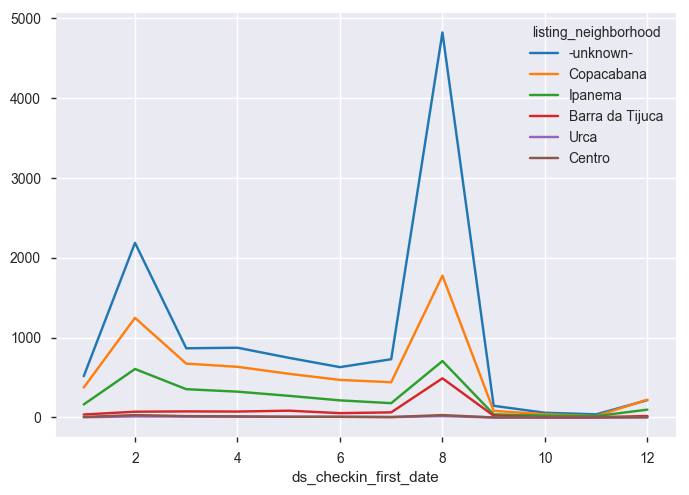

In [236]:
list_of_cities = ['-unknown-','Copacabana','Ipanema','Barra da Tijuca','Urca','Centro']
df_contacts_2.groupby([df_contacts_2['ds_checkin_first_date'].dt.month,'listing_neighborhood']).size()\
.unstack(fill_value=0)[list_of_cities].plot()

In [204]:
df_contacts_2['listing_neighborhood'].value_counts()

-unknown-                   11828
Copacabana                  6527 
Ipanema                     2994 
Leblon                      1021 
Barra da Tijuca             998  
Botafogo                    755  
Santa Teresa                589  
Flamengo                    457  
Lapa                        425  
Leme                        390  
Recreio dos Bandeirantes    233  
Laranjeiras                 198  
Lagoa                       161  
Glória                      126  
Centro                      122  
Catete                      110  
Tijuca                      109  
Vidigal                     105  
Gávea                       86   
Jardim Botânico             79   
Urca                        78   
Humaitá                     60   
Vila Isabel                 51   
São Conrado                 40   
Cosme Velho                 39   
Estacio                     33   
Maracanã                    32   
Rio Comprido                27   
Praça da Bandeira           27   
São Cristóvão 

### Lets look at countries with the most visitors

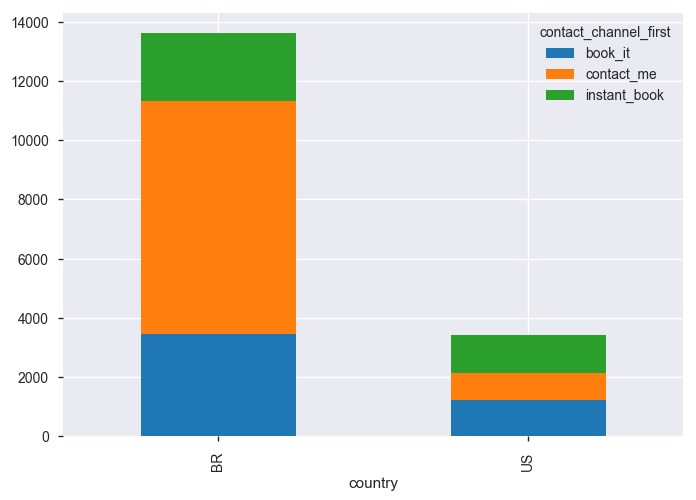

In [92]:
tmp.groupby(['country','contact_channel_first']).size().unstack().plot(kind='bar', stacked=True)

In [99]:
tmp.groupby(['country','contact_channel_first']).size()

country  contact_channel_first
BR       book_it                  3459
         contact_me               7875
         instant_book             2279
US       book_it                  1232
         contact_me               903 
         instant_book             1278
dtype: int64

In [245]:
tmp2 = df_contacts_2[['listing_neighborhood','contact_channel_first']][(df_contacts_2['country'] == 'US')]

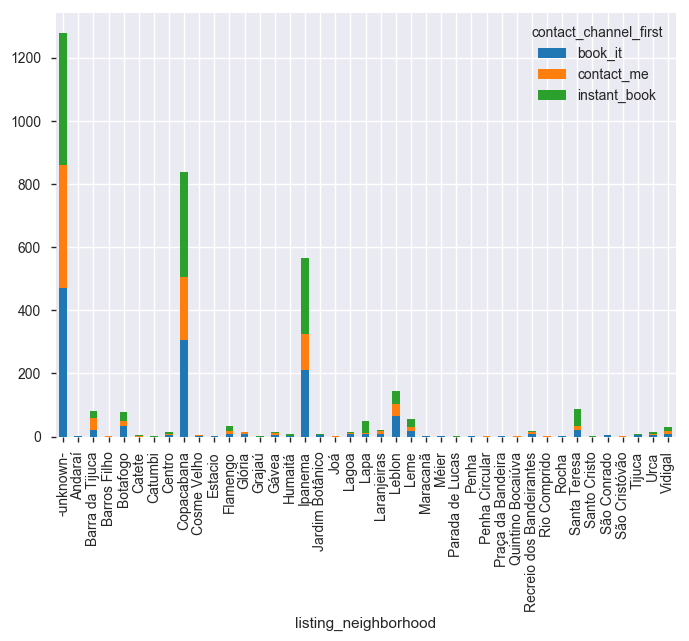

In [246]:
tmp2.groupby(['listing_neighborhood','contact_channel_first']).size().unstack().plot(kind='bar', stacked=True)

### Top listing neighborhoods

In [175]:
neighborhood_list = df_contacts_2['listing_neighborhood'].value_counts().keys()[:5]
neighborhood_list

Index(['-unknown-', 'Copacabana', 'Ipanema', 'Leblon', 'Barra da Tijuca'], dtype='object')

In [176]:
tmp2 = df_contacts_2[['country','listing_neighborhood']][(df_contacts_2['country'].isin(['US','BR'])) & 
                                                         (df_contacts_2['listing_neighborhood'].isin(neighborhood_list))]

### Neighborhoods most popular with visitors from BR and US

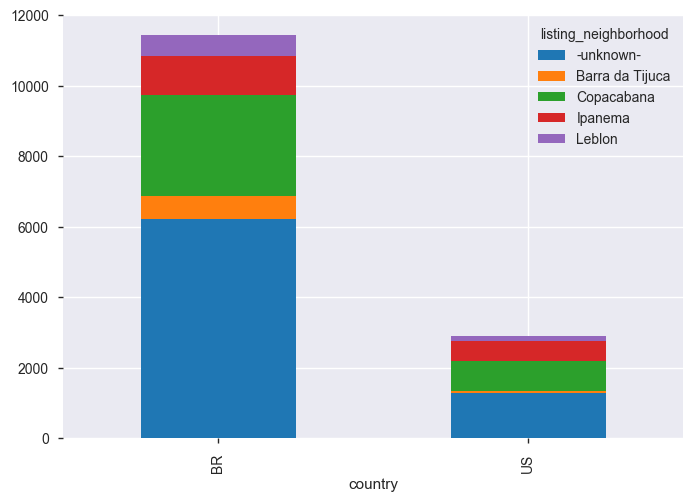

In [177]:
tmp2.groupby(['country','listing_neighborhood']).size().unstack().plot(kind='bar', stacked=True)

In [178]:
a = tmp2['listing_neighborhood'][tmp2['country'] == 'US'].value_counts(normalize=True)
b = tmp2['listing_neighborhood'][tmp2['country'] == 'BR'].value_counts(normalize=True)
c = pd.concat([a,b],axis=1)
c.columns = ['US','BR']
c

,US,BR
-unknown-,0.439738,0.543849
Barra da Tijuca,0.027548,0.057445
Copacabana,0.288912,0.250940
Ipanema,0.194215,0.096092
Leblon,0.049587,0.051674


Text(0.5,1,'visitors')

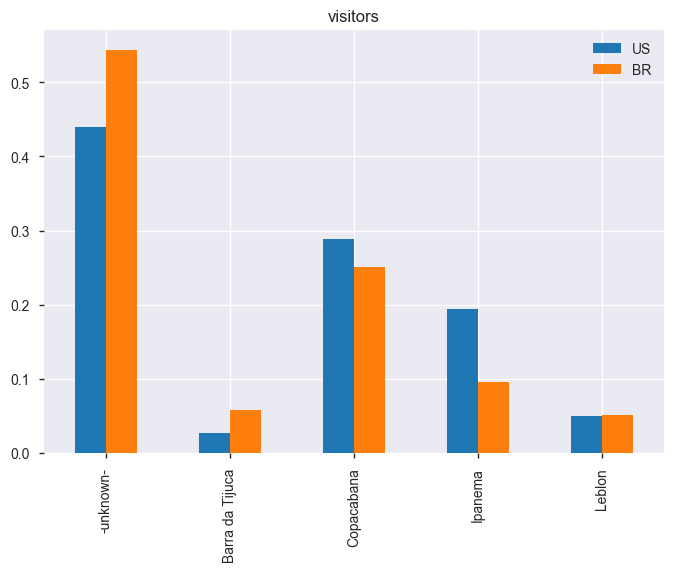

In [179]:
c.plot(kind='bar')
plt.title('visitors')

### Lets analyze: for users who used contact me, how long before inquiry to booking if so?

In [256]:
tmp1 = df_contacts_2['ts_interaction_first'][(df_contacts_2['contact_channel_first'] == 'contact_me') \
                                    & (df_contacts_2['convert'] ==1)]

In [280]:
tmp11 = df_contacts_2['ts_interaction_first'][(df_contacts_2['contact_channel_first'] == 'contact_me')]
tmp22 = df_contacts_2['ts_accepted_at_first'][(df_contacts_2['contact_channel_first'] == 'contact_me') ]

In [281]:
tmp11.head()

0     2016-01-17 13:33:32
3     2016-04-16 22:16:19
4     2016-04-17 20:20:42
6     2016-01-26 23:15:12
11    2016-04-19 18:47:31
Name: ts_interaction_first, dtype: object

In [252]:
tmp3 = df_contacts_2['ts_interaction_first'][(df_contacts_2['contact_channel_first'] == 'contact_me') \
                                    & (df_contacts_2['convert'] ==0)]

In [253]:
tmp2 = df_contacts_2['ts_accepted_at_first'][(df_contacts_2['contact_channel_first'] == 'contact_me') \
                                    & (df_contacts_2['convert'] ==1)]

In [254]:
tmp4 = df_contacts_2['ts_accepted_at_first'][(df_contacts_2['contact_channel_first'] == 'contact_me') \
                                    & (df_contacts_2['convert'] ==0)]

In [258]:
tmp1.describe()
tmp2.describe()

count     911                
unique    911                
top       2016-05-31 10:23:26
freq      1                  
Name: ts_interaction_first, dtype: object

count     911                  
unique    911                  
top       2016-01-11 16:00:53.0
freq      1                    
Name: ts_accepted_at_first, dtype: object

In [259]:
tmp1 = pd.to_datetime(tmp1)
tmp2 = pd.to_datetime(tmp2)

In [282]:
tmp11 = pd.to_datetime(tmp11)
tmp22 = pd.to_datetime(tmp22)

In [260]:
tmp3 = pd.to_datetime(tmp3)
tmp4 = pd.to_datetime(tmp4)

In [261]:
tmp1.describe()

count     911                
unique    911                
top       2016-01-11 23:46:31
freq      1                  
first     2016-01-02 02:36:18
last      2016-06-30 23:54:39
Name: ts_interaction_first, dtype: object

In [262]:
df_contacts_2['inquiry_to_booking'] = tmp2 - tmp1

In [263]:
df_contacts_2['inquiry_to_booking'].head()

0   NaT     
1   NaT     
2   NaT     
3   NaT     
4   15:40:33
Name: inquiry_to_booking, dtype: timedelta64[ns]

In [264]:
df_contacts_2['inquiry_to_booking2'] = tmp4 - tmp3

In [265]:
x = tmp2 - tmp1
x = x.dt.seconds/3600

In [284]:
x_2 = tmp22 -tmp11
x_2 = x_2.dt.seconds/3600

In [266]:
x2 = tmp4 - tmp3
x2 = x2.dt.seconds/3600

In [267]:
type(x2)

pandas.core.series.Series

In [268]:
x2.dropna(axis=0, inplace=True)

In [271]:
x2.head()
len(x2)

3     21.407778
6     10.395833
17    2.333889 
26    3.683611 
36    1.946111 
dtype: float64

4571

In [272]:
x.head()
len(x)

4     15.675833
16    1.377500 
50    10.161944
72    4.193611 
85    6.051667 
dtype: float64

911

In [275]:
x_1 = [int(i) for i in x]

[15,
 1,
 10,
 4,
 6,
 9,
 2,
 5,
 0,
 20,
 16,
 10,
 0,
 4,
 13,
 1,
 10,
 12,
 23,
 5,
 1,
 1,
 9,
 1,
 20,
 1,
 1,
 5,
 0,
 1,
 0,
 12,
 0,
 11,
 11,
 1,
 0,
 18,
 13,
 0,
 20,
 22,
 3,
 0,
 0,
 17,
 1,
 2,
 12,
 12,
 18,
 21,
 17,
 2,
 6,
 14,
 0,
 10,
 2,
 0,
 2,
 0,
 8,
 0,
 0,
 14,
 2,
 10,
 11,
 1,
 0,
 9,
 5,
 16,
 2,
 13,
 9,
 21,
 5,
 15,
 14,
 12,
 10,
 3,
 9,
 5,
 0,
 3,
 0,
 1,
 0,
 23,
 1,
 0,
 9,
 1,
 6,
 6,
 0,
 0,
 22,
 0,
 6,
 16,
 0,
 10,
 0,
 0,
 1,
 0,
 0,
 22,
 23,
 0,
 13,
 0,
 15,
 18,
 7,
 2,
 0,
 4,
 0,
 2,
 0,
 4,
 0,
 18,
 9,
 23,
 0,
 2,
 22,
 1,
 8,
 0,
 3,
 8,
 2,
 0,
 0,
 13,
 16,
 23,
 19,
 1,
 0,
 19,
 4,
 0,
 1,
 17,
 0,
 19,
 7,
 15,
 4,
 8,
 0,
 14,
 0,
 0,
 0,
 1,
 1,
 0,
 19,
 0,
 1,
 0,
 20,
 5,
 14,
 6,
 0,
 11,
 11,
 0,
 8,
 2,
 23,
 10,
 23,
 0,
 0,
 0,
 7,
 0,
 23,
 11,
 21,
 3,
 10,
 1,
 0,
 0,
 1,
 20,
 0,
 1,
 0,
 9,
 0,
 6,
 0,
 22,
 0,
 0,
 17,
 1,
 21,
 23,
 16,
 8,
 1,
 1,
 0,
 19,
 20,
 21,
 0,
 1,
 0,
 7,
 18,
 8,
 3,
 2,
 1,
 0,
 2

In [286]:
x_2 = [int(i) for i in x_2.fillna(0)]

In [305]:
df_x = pd.DataFrame(x_1,columns=['hours'])
df_x = df_x.groupby('hours').size()
df_x = pd.DataFrame(df_x,columns = ['count'])
df_x.reset_index(inplace=True)

In [306]:
df_x2 = pd.DataFrame(x_2,columns=['hours'])
df_x2 = df_x2.groupby('hours').size()
df_x2 = pd.DataFrame(df_x2,columns = ['count'])
df_x2.reset_index(inplace=True)

In [307]:
df_x

,hours,count
0,0,312
1,1,115
2,2,55
3,3,36
4,4,32
5,5,26
6,6,24
7,7,23
8,8,17
9,9,27


In [308]:
df_x_main = pd.merge(df_x,df_x2,on = 'hours',how = 'inner')

,hours,count_x,count_y,percent_convert
0,0,312,9161,0.034057
1,1,115,559,0.205725
2,2,55,340,0.161765
3,3,36,229,0.157205
4,4,32,200,0.160000


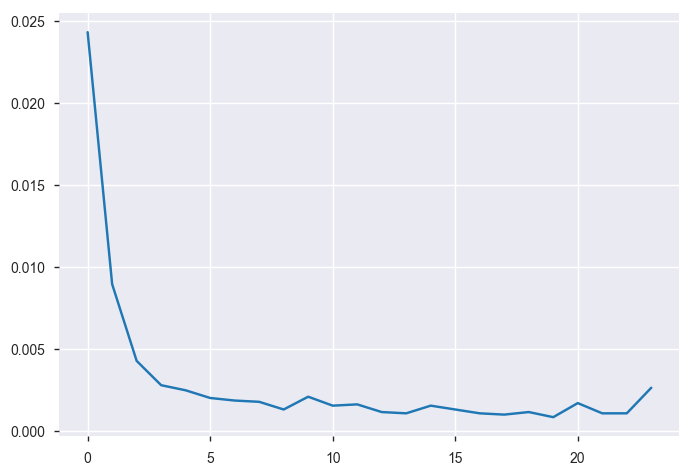

In [311]:
df_x_main.head()
df_x_main['percent_convert'] = df_x_main['count_x']/12828
df_x_main['percent_convert'].plot()

Text(0.5,0,'Hours to accept')

Text(0,0.5,'Number of users')

Text(0.5,1,'converted')

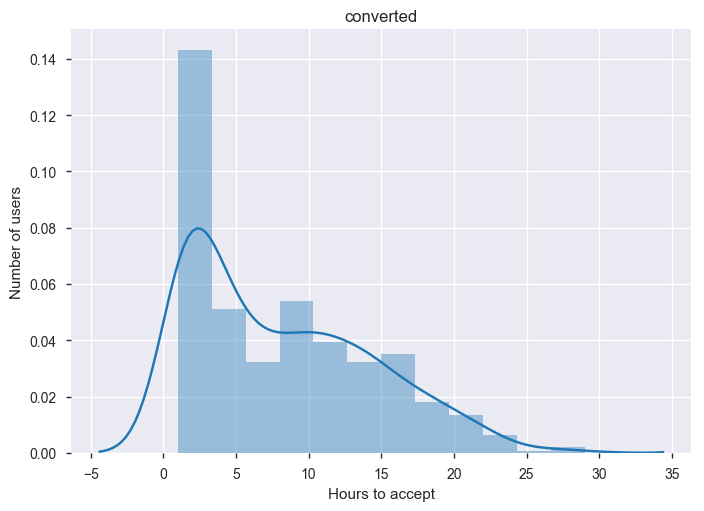

In [182]:
## x.hist(bins=20)
sns.distplot(x)
plt.xlabel('Hours to accept')
plt.ylabel('Number of users')
plt.title('converted')

Text(0.5,0,'Hours to respond')

Text(0,0.5,'Number of users')

Text(0.5,1,'Did not convert')

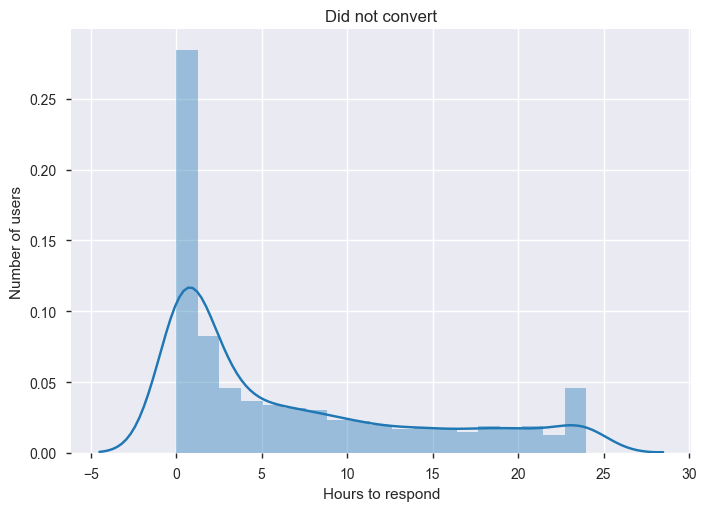

In [181]:
sns.distplot(x2)
plt.xlabel('Hours to respond')
plt.ylabel('Number of users')
plt.title('Did not convert')

# lets look at hosts that accepted but didnt get a booking

In [193]:
host_unbooked = df_contacts_2[(df_contacts_2['ts_accepted_at_first'].notnull()) & \
              (df_contacts_2['ts_booking_at'].isnull())]

In [194]:
host_booked = df_contacts_2[(df_contacts_2['ts_accepted_at_first'].notnull()) & \
              (df_contacts_2['ts_booking_at'].notnull())]

In [195]:
host_unbooked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828 entries, 3 to 27882
Data columns (total 27 columns):
id_guest_anon                           4828 non-null object
id_host_anon                            4828 non-null object
id_listing_anon                         4828 non-null object
ts_interaction_first                    4828 non-null object
ts_reply_at_first                       4828 non-null object
ts_accepted_at_first                    4828 non-null object
ts_booking_at                           0 non-null object
ds_checkin_first                        4828 non-null datetime64[ns]
ds_checkout_first                       4828 non-null datetime64[ns]
m_guests                                4828 non-null float64
m_interactions                          4828 non-null int64
m_first_message_length_in_characters    4828 non-null float64
contact_channel_first                   4828 non-null category
guest_user_stage_first                  4828 non-null object
booking_type_cat      

In [196]:
host_unbooked['contact_channel_first'].value_counts()

contact_me      4571
book_it         257 
instant_book    0   
Name: contact_channel_first, dtype: int64

### Lets see what location are mostly unbooked

In [197]:
host_unbooked.groupby(['listing_neighborhood','country']).size()

listing_neighborhood  country
-unknown-             AE         3   
                      AR         230 
                      AT         1   
                      AU         20  
                      BA         1   
                      BE         4   
                      BG         1   
                      BO         1   
                      BR         1236
                      BS         1   
                      BZ         1   
                      CA         18  
                      CH         11  
                      CL         29  
                      CN         11  
                      CO         25  
                      CR         1   
                      DE         23  
                      DK         3   
                      EC         1   
                      EG         2   
                      ES         18  
                      FI         1   
                      FR         60  
                      GB         47  
                    

In [198]:
s = host_unbooked['country'].groupby(host_unbooked['listing_neighborhood']).value_counts()

In [199]:
y = host_booked['country'].groupby(host_booked['listing_neighborhood']).value_counts()

In [200]:
y.groupby(level=0).nlargest(3)

listing_neighborhood  listing_neighborhood  country
-unknown-             -unknown-             BR         1727
                                            US         680 
                                            FR         256 
Abolição              Abolição              FR         1   
Andaraí               Andaraí               US         3   
                                            BR         1   
Barra da Tijuca       Barra da Tijuca       BR         239 
                                            US         31  
                                            AR         27  
Benfica               Benfica               BR         1   
Botafogo              Botafogo              BR         121 
                                            US         46  
                                            FR         31  
Catete                Catete                BR         18  
                                            US         3   
                                            CA  

In [202]:
top_10_country = df_contacts_2['country'].value_counts().nlargest(10).keys()

In [203]:
y2 = host_booked['listing_neighborhood'][host_booked['country'].isin(top_10_country)].groupby(host_booked['country']).value_counts()

In [204]:
y2 = y2.groupby(level=0).nlargest(3)

In [205]:
y2

country  country  listing_neighborhood
AR       AR       -unknown-               250 
                  Copacabana              218 
                  Ipanema                 108 
AU       AU       -unknown-               90  
                  Copacabana              86  
                  Ipanema                 38  
BR       BR       -unknown-               1727
                  Copacabana              879 
                  Ipanema                 332 
CA       CA       -unknown-               73  
                  Copacabana              72  
                  Ipanema                 39  
CL       CL       Copacabana              84  
                  -unknown-               77  
                  Ipanema                 33  
DE       DE       -unknown-               152 
                  Copacabana              123 
                  Ipanema                 58  
FR       FR       -unknown-               256 
                  Copacabana              206 
                  Ipa

In [206]:
y3 = pd.DataFrame(y2)

In [207]:
y3.columns = ['count']

In [209]:
y3 = y3.reset_index(level=0, drop=True).reset_index()

In [211]:
y3.head()

,index,country,listing_neighborhood,count
0,0,AR,-unknown-,250
1,1,AR,Copacabana,218
2,2,AR,Ipanema,108
3,3,AU,-unknown-,90
4,4,AU,Copacabana,86


### Find opportunities by neighborhood with total book listings by neighborhoos/total listings in neighborhood

In [334]:
a = df_listing.groupby('listing_neighborhood').size().reset_index(name='count_a')

In [335]:
b = host_booked.groupby('listing_neighborhood').size().reset_index(name='count_b')

In [337]:
c = pd.merge(a, b, on='listing_neighborhood')

In [344]:
c['percentage_unfilled'] = (1-(c['count_b']/c['count_a'])).round(2)*100

In [358]:
c = c.sort_values(['count_a','percentage_unfilled'],ascending=False)

In [397]:
c.head()

,listing_neighborhood,count_a,count_b,percentage_unfilled
0,-unknown-,7397,4306,42.0
10,Copacabana,2646,2880,-9.0
22,Ipanema,1088,1415,-30.0
3,Barra da Tijuca,616,365,41.0
29,Leblon,477,474,1.0


### types of homes by area


In [348]:
df_listing['room_type'].groupby(df_listing['listing_neighborhood']).value_counts()

listing_neighborhood      room_type      
-unknown-                 Entire home/apt    5263
                          Private room       1885
                          Shared room        249 
Abolição                  Entire home/apt    1   
Andaraí                   Entire home/apt    4   
                          Private room       3   
Barra da Tijuca           Entire home/apt    523 
                          Private room       89  
                          Shared room        4   
Barros Filho              Entire home/apt    3   
Benfica                   Entire home/apt    1   
                          Private room       1   
Bonsucesso                Entire home/apt    1   
                          Private room       1   
                          Shared room        1   
Botafogo                  Entire home/apt    239 
                          Private room       119 
                          Shared room        11  
Brás de Pina              Entire home/apt    1   
        

In [313]:
df_listing.groupby('listing_neighborhood').size().sort_values(ascending = False).head()

listing_neighborhood
-unknown-          7397
Copacabana         2646
Ipanema            1088
Barra da Tijuca    616 
Leblon             477 
dtype: int64

In [370]:
# listing neighborhood can have between 1 to 7397 homes. Lets get neighborhood thats above the 75 percentile.  (25% of homes)
df_listing.groupby('listing_neighborhood').size().sort_values(ascending = False).describe()

count    72.000000  
mean     202.972222 
std      926.363874 
min      1.000000   
25%      1.750000   
50%      7.000000   
75%      57.750000  
max      7397.000000
dtype: float64

### Lets shorten the list of neighborhoods to have at least 57 homes (25 % of all listings) We dont want the market to be too small that its hard to recommend homes to users.

In [372]:
new_df_listing = df_listing.groupby('listing_neighborhood').size().sort_values(ascending = False)

In [375]:
new_df_listing = pd.DataFrame(new_df_listing)

In [380]:
new_df_listing = new_df_listing.reset_index()

In [381]:
new_df_listing.columns = ['listing_neighborhood','count']

In [385]:
short_list_neighborhood = new_df_listing['listing_neighborhood'][new_df_listing['count'] > 57]

### Breakdown of home types in the short listed neighborhoods. 

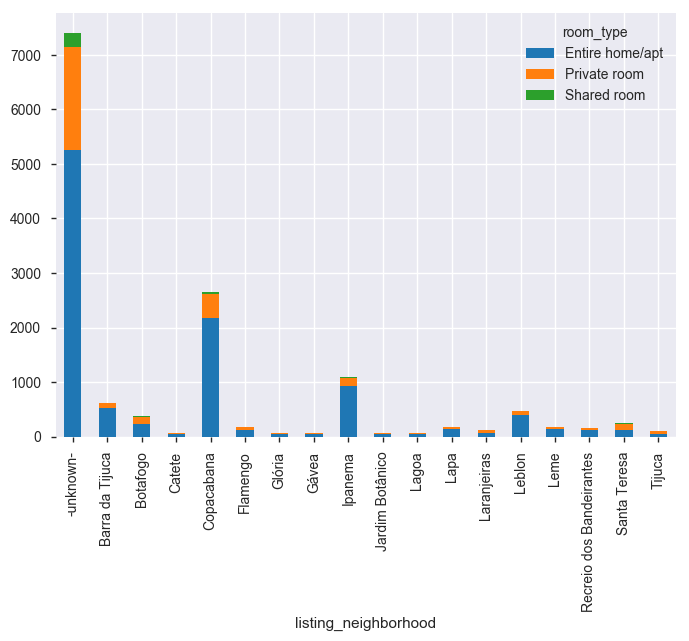

In [386]:
df_listing[df_listing['listing_neighborhood'].isin(short_list_neighborhood)].groupby(['listing_neighborhood','room_type']).size().unstack().plot(kind='bar', stacked=True)

### We create something called the tier 2 neigborhood that have enough listings but are not over demanded

In [400]:
tier2_neighborhood = c[(c['listing_neighborhood'].isin(short_list_neighborhood)) &\
                                              (c['percentage_unfilled'] > 0)]

In [401]:
tier2_neighborhood

,listing_neighborhood,count_a,count_b,percentage_unfilled
0,-unknown-,7397,4306,42.0
3,Barra da Tijuca,616,365,41.0
29,Leblon,477,474,1.0
5,Botafogo,369,305,17.0
37,Recreio dos Bandeirantes,165,93,44.0
28,Laranjeiras,130,77,41.0
47,Tijuca,98,48,51.0
18,Glória,68,53,22.0
24,Jardim Botânico,62,26,58.0
6,Catete,62,39,37.0


### Preference of visitors room type
Example, visitors from top 10 visiting countries, what are their room_type prefrence

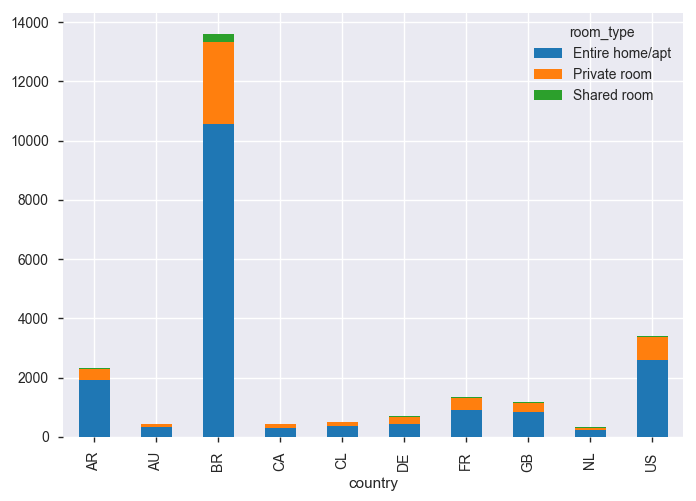

In [395]:
df_contacts_2[df_contacts_2['country'].isin(top_10_country)].groupby(['country','room_type']).size().unstack().plot(kind='bar', stacked=True)

### top 3 neighborhood by country

In [462]:
y3.head(6)

,country,listing_neighborhood,count
0,AR,-unknown-,250
1,AR,Copacabana,218
2,AR,Ipanema,108
3,AU,-unknown-,90
4,AU,Copacabana,86
5,AU,Ipanema,38


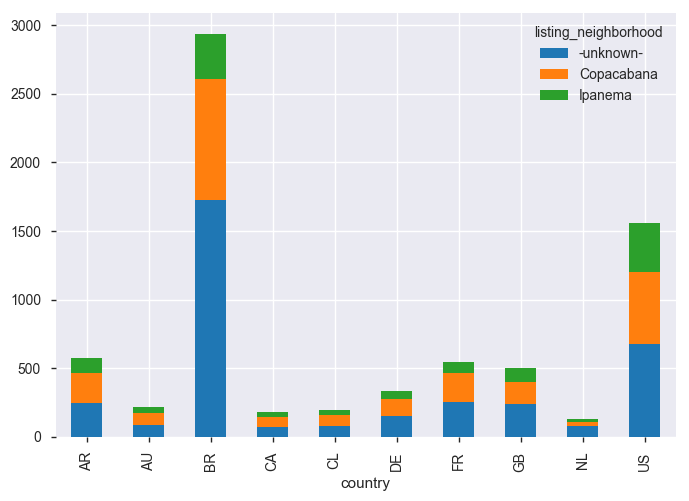

In [489]:
y3.pivot('country','listing_neighborhood','count').plot(stacked=True, kind='bar')
